<p style="font-family: 'Courier New', Courier, monospace; font-size: 50px; font-weight: bold; color: blue;  text-align: center;">
  LoRaWAN Path Loss Measurements in an Indoor Setting: MAIN DATA SORTING
</p>

<div style="text-align: center;">
    <img src="lorawan.png" alt="LoRaWAN">
    <div style="text-align: right;">Photo Credit: <a href="https://onesight.solutions/wp-content/uploads/2023/10/LoraWAN-Test-Kit-Sales-Tech-Rev-2.pdf">Here</a></div>
</div>


In [3]:
# Libraries/Packages Used:

import pandas as pd                        # For data manipulation and analysis.
import matplotlib.pyplot as plt            # For creating static visualizations.

In [4]:
# Read data from a local CSV file
new_df = pd.read_csv('../all_data_files/unsorted_combined_measurements_data.csv', low_memory=False)

# Print the info about the combined DataFrame
print("\nInfo of Combined DataFrame:\n")
new_df.info()


Info of Combined DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116026 entries, 0 to 1116025
Data columns (total 71 columns):
 #   Column                                                   Non-Null Count    Dtype  
---  ------                                                   --------------    -----  
 0   time                                                     1116026 non-null  object 
 1   correlation_ids_0                                        1116026 non-null  object 
 2   device_id                                                1116026 non-null  object 
 3   end_device_ids_application_ids_application_id            1116026 non-null  object 
 4   end_device_ids_dev_addr                                  1116026 non-null  object 
 5   end_device_ids_dev_eui                                   1116026 non-null  object 
 6   end_device_ids_device_id                                 1116026 non-null  object 
 7   end_device_ids_join_eui                                  111

Found 2 rows with invalid datetime format:


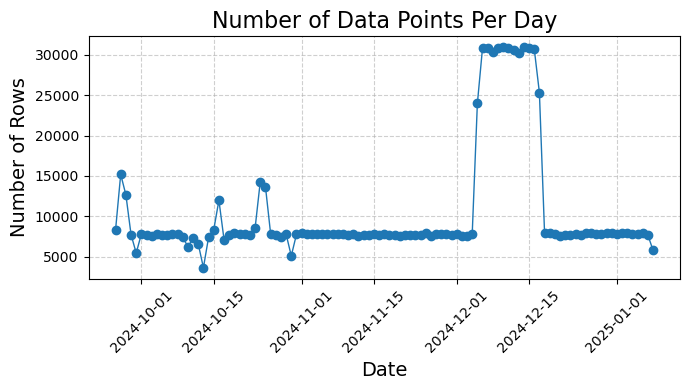

In [5]:
# Ensure 'time' column is in string format
new_df['time'] = new_df['time'].astype(str)

# Convert 'time' to datetime, handling time zones and errors
new_df['time'] = pd.to_datetime(new_df['time'], errors='coerce', utc=True)

# Check for rows where parsing failed
invalid_times = new_df[new_df['time'].isna()]
if not invalid_times.empty:
    print(f"Found {len(invalid_times)} rows with invalid datetime format:")

# Drop rows with invalid 'time' values
new_df = new_df.dropna(subset=['time'])

# Extract the date part from the 'time' column
new_df['date'] = new_df['time'].dt.date

# Count the number of rows per day
rows_per_day = new_df.groupby('date').size()

# Plot the number of rows per day as a line plot
plt.figure(figsize=(7, 4))
rows_per_day.plot(kind='line', marker='o', linestyle='-', linewidth=1)
plt.title('Number of Data Points Per Day', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Rows', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Initialize an empty set to collect unique gateway IDs
unique_gateways = set()

# Loop over the metadata indices (adjust the range if you have more metadata columns)
for i in range(3):  # this covers metadata_0, metadata_1, metadata_2
    col_name = f'uplink_message_rx_metadata_{i}_gateway_ids_gateway_id'
    if col_name in new_df.columns:
        # Add unique values from the column to the set, excluding NaN
        unique_gateways.update(new_df[col_name].dropna().unique())

# Number of unique gateways
num_unique_gateways = len(unique_gateways)
print("Number of unique gateways:", num_unique_gateways)

# Optionally, list them
print("Unique gateway IDs:", unique_gateways)

Number of unique gateways: 3
Unique gateway IDs: {'eui-a84041ffff22dea4', 'kerlink001', 'eui-a84041ffff22def8'}


In [7]:
# Initialize an empty set to collect unique gateway IDs
unique_gateways = set()

# Loop over the metadata indices to find all unique gateway IDs
for i in range(3):  # This covers metadata_0, metadata_1, metadata_2
    col_name = f'uplink_message_rx_metadata_{i}_gateway_ids_gateway_id'
    if col_name in new_df.columns:
        # Add unique values from the column to the set, excluding NaN
        unique_gateways.update(new_df[col_name].dropna().unique())

# Dictionary to store the sum of rows for each gateway
gateway_row_counts = {}

# Count rows for each gateway across all metadata columns
for gw in unique_gateways:
    # Create a boolean mask for the gateway in any metadata column
    mask = (
        (new_df['uplink_message_rx_metadata_0_gateway_ids_gateway_id'] == gw) |
        (new_df['uplink_message_rx_metadata_1_gateway_ids_gateway_id'] == gw) |
        (new_df['uplink_message_rx_metadata_2_gateway_ids_gateway_id'] == gw)
    )
    # Count rows where the mask is True
    gateway_row_counts[gw] = mask.sum()

# Print the results
print("Rows per gateway:")
for gw, count in gateway_row_counts.items():
    print(f"{gw}: {count}")

Rows per gateway:
eui-a84041ffff22dea4: 120384
kerlink001: 1102571
eui-a84041ffff22def8: 767144


In [8]:
# Define the target gateway ID
target_gateway = "kerlink001"

# Create a boolean mask for rows where the gateway ID matches in any metadata column
mask = (
    (new_df['uplink_message_rx_metadata_0_gateway_ids_gateway_id'] == target_gateway) |
    (new_df['uplink_message_rx_metadata_1_gateway_ids_gateway_id'] == target_gateway) |
    (new_df['uplink_message_rx_metadata_2_gateway_ids_gateway_id'] == target_gateway)
)

# Filter the DataFrame to retain only rows with the target gateway
new_df = new_df[mask]

# Reset the index if desired (optional)
new_df.reset_index(drop=True, inplace=True)

# Display the result
new_df.shape

(1102571, 72)

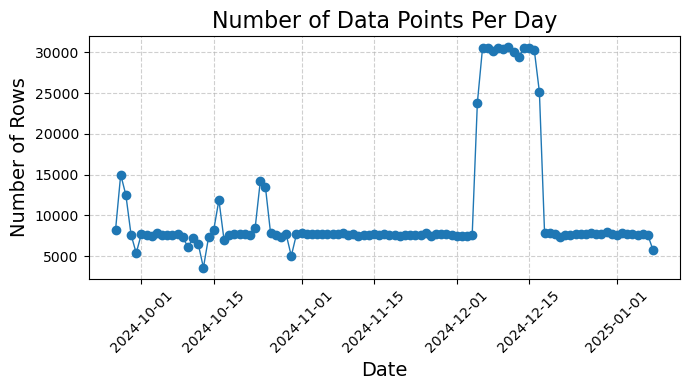

In [9]:
# Ensure 'time' column is in string format
new_df['time'] = new_df['time'].astype(str)

# Convert 'time' to datetime, handling time zones and errors
new_df['time'] = pd.to_datetime(new_df['time'], errors='coerce', utc=True)

# Check for rows where parsing failed
invalid_times = new_df[new_df['time'].isna()]
if not invalid_times.empty:
    print(f"Found {len(invalid_times)} rows with invalid datetime format:")

# Drop rows with invalid 'time' values
new_df = new_df.dropna(subset=['time'])

# Extract the date part from the 'time' column
new_df['date'] = new_df['time'].dt.date

# Count the number of rows per day
rows_per_day = new_df.groupby('date').size()

# Plot the number of rows per day as a line plot
plt.figure(figsize=(7, 4))
rows_per_day.plot(kind='line', marker='o', linestyle='-', linewidth=1)
plt.title('Number of Data Points Per Day', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Rows', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_1204\2498778803.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(remove_confirmed_repeats, threshold_seconds=2.0)


Original shape: (1102571, 72)
Deduplicated shape: (781995, 72)


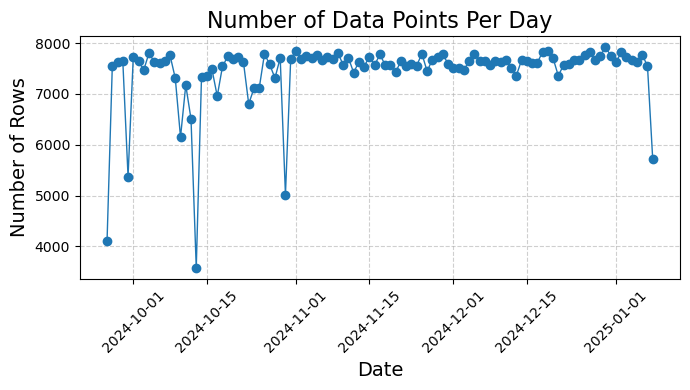

In [10]:
def remove_confirmed_repeats(group, threshold_seconds=2.0):
    """
    For a single device-group, remove repeated frames that arrive within 'threshold_seconds'.
      - Sort by time
      - Compute dt = time diff, df_cnt = frame counter diff
      - If df_cnt == 0 AND dt < threshold_seconds => mark as duplicate
      - Keep only the first occurrence
    """
    group = group.sort_values("time").copy()

    # Time difference between consecutive rows
    group["dt"] = group["time"].diff().dt.total_seconds()

    # Frame counter difference
    group["df_cnt"] = group["uplink_message_f_cnt"].diff()

    # Mark duplicates
    group["is_duplicate"] = False

    for i in range(1, len(group)):
        if (
            group.iloc[i]["df_cnt"] == 0
            and group.iloc[i]["dt"] is not None
            and group.iloc[i]["dt"] < threshold_seconds
        ):
            group.iat[i, group.columns.get_loc("is_duplicate")] = True

    # Return only non-duplicates
    return group[~group["is_duplicate"]]


new_df["time"] = pd.to_datetime(new_df["time"], utc=True, errors="coerce")

new_df = new_df.sort_values(["end_device_ids_device_id", "time"])

# 1. Group by device and apply deduplication
df_dedup = (
    new_df.groupby("end_device_ids_device_id", group_keys=False)
      .apply(remove_confirmed_repeats, threshold_seconds=2.0)
)

# 2. Clean up columns/index
df_dedup.drop(columns=["dt", "df_cnt", "is_duplicate"], inplace=True, errors="ignore")
df_dedup.reset_index(drop=True, inplace=True)

print("Original shape:", new_df.shape)
print("Deduplicated shape:", df_dedup.shape)

# 3. Plot daily counts
df_dedup["date"] = df_dedup["time"].dt.date
daily_counts = df_dedup.groupby("date").size()

plt.figure(figsize=(7, 4))
daily_counts.plot(
    kind='line', 
    marker='o', 
    linestyle='-', 
    linewidth=1
)
plt.title('Number of Data Points Per Day', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Rows', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Save the cleaned and aggregated and SORTED data to a CSV file 
df_dedup.to_csv('../all_data_files/combined_measurements_data.csv', index=False)

In [12]:
df_dedup
df_dedup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781995 entries, 0 to 781994
Data columns (total 72 columns):
 #   Column                                                   Non-Null Count   Dtype              
---  ------                                                   --------------   -----              
 0   time                                                     781995 non-null  datetime64[ns, UTC]
 1   correlation_ids_0                                        781995 non-null  object             
 2   device_id                                                781995 non-null  object             
 3   end_device_ids_application_ids_application_id            781995 non-null  object             
 4   end_device_ids_dev_addr                                  781995 non-null  object             
 5   end_device_ids_dev_eui                                   781995 non-null  object             
 6   end_device_ids_device_id                                 781995 non-null  object            